In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


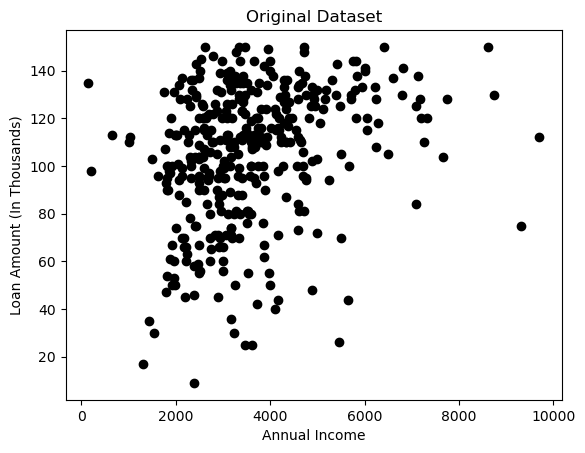

In [2]:
# Read the features
X = data[["LoanAmount","ApplicantIncome"]]

# Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.title('Original Dataset')
plt.show()

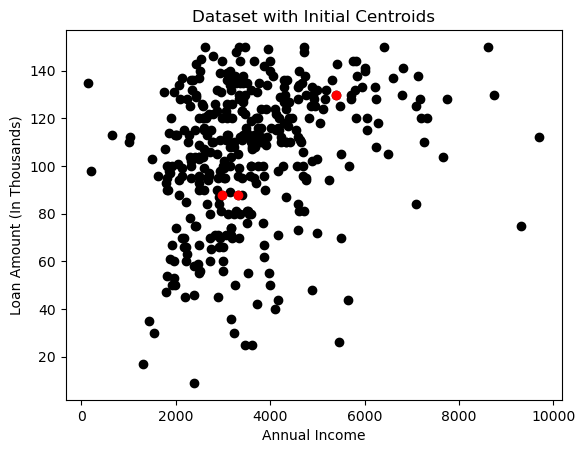

In [3]:
# Step1 - Choose the Number of Clusters (K)
K=3

# Step2 - Select Random Centroid for each Cluster
Centroids = (X.sample(n=K))

# Plot the Centroids
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.title('Dataset with Initial Centroids')
plt.show()

In [4]:
print('Initial Centroids: \n',Centroids)
# Step3 - Assign all the points to the closest cluster centroid
# Step4 - Recompute centroids of newly formed clusters
# Step5 - Repeat step 3 and 4

diff = 1
j=0
p=1
print("\nDifference between Previous and Current Centroids:")
while(diff!=0):
    # XD will contain distance of each point from each cluster
    XD=X.copy()
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in X.iterrows():
            # Calculate distance of each point to centroid
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        XD[i]=ED
        i=i+1
        
    # Store the Cluster number for each point
    C=[]
    for index,row in XD.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    XD["Cluster"]=C
    Centroids_new = XD.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print("Round",p,": ",diff.sum())
        p=p+1
    Centroids = XD.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

Initial Centroids: 
      LoanAmount  ApplicantIncome
238       130.0             5391
87         88.0             3316
375        88.0             2987

Difference between Previous and Current Centroids:
Round 1 :  245.2644471616966
Round 2 :  296.6167306177822
Round 3 :  234.6779564386627
Round 4 :  205.13084046778445
Round 5 :  96.60716651619987
Round 6 :  80.42253001270922
Round 7 :  99.50821192263949
Round 8 :  27.38200063816943
Round 9 :  18.274686272279013
Round 10 :  9.21023994083339
Round 11 :  18.345487493007468
Round 12 :  46.27013250786139
Round 13 :  0.0


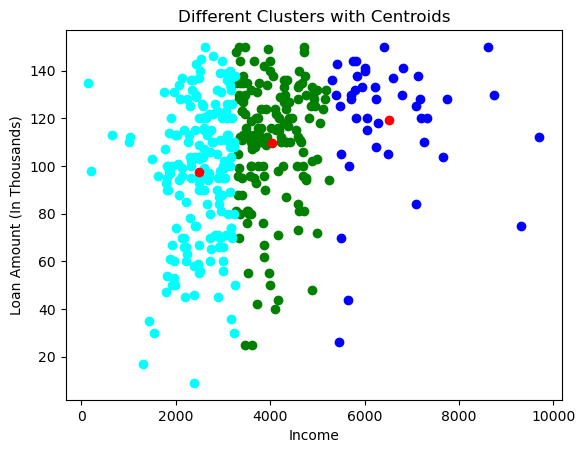

In [5]:
# Plot Clusters with differnt colors
color=['blue','green','cyan']
for k in range(K):
    data=XD[XD["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.title('Different Clusters with Centroids')
plt.show()